Spam detection

Read dataset and make it in proper format.

Encode labels

Convert all cases to lower

Remove punctuations

Remove Stopwords

Check stats of messages

Convert all texts into vectors

Import classifier

Train and test

Check the accuracy/confusion matrix

Train model for each text column to check the spam message count.




In [2]:
# Import all required libraries 

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files 
uploaded = files.upload()   

Saving messages.csv to messages.csv


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['messages.csv'])) 
print(df)

                                                subject  ... label
0               job posting - apple-iss research center  ...     0
1                                                   NaN  ...     0
2     query : letter frequencies for text identifica...  ...     0
3                                                  risk  ...     0
4                              request book information  ...     0
...                                                 ...  ...   ...
2888                       love your profile - ysuolvpv  ...     1
2889                 you have been asked to join kiddin  ...     1
2890                 anglicization of composers ' names  ...     0
2891  re : 6 . 797 , comparative method : n - ary co...  ...     0
2892               re : american - english in australia  ...     0

[2893 rows x 3 columns]


In [ ]:
email = pd.read_csv('messages.csv',encoding='latin-1')
email.head()

subject  ... label
0            job posting - apple-iss research center  ...     0
1                                                NaN  ...     0
2  query : letter frequencies for text identifica...  ...     0
3                                               risk  ...     0
4                           request book information  ...     0

[5 rows x 3 columns]

In [ ]:
print ('Shape = >',email.shape)

Shape = > (2893, 3)


In [ ]:
print ('notspam and spam counts','\n',email.label.value_counts())

notspam and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [ ]:
#Ratio
print ('spam ratio = ', round(len(email[email['label']==1]) / len(email.label),2)*100,'%')
print ('nonspam ratio  = ', round(len(email[email['label']==0]) / len(email.label),2)*100,'%')

spam ratio =  17.0 %
nonspam ratio  =  83.0 %


In [ ]:
#New column for Length of message
email['length'] = email.message.str.len()
email.head(5)

subject  ... length
0            job posting - apple-iss research center  ...   2559
1                                                NaN  ...   1689
2  query : letter frequencies for text identifica...  ...   1356
3                                               risk  ...    315
4                           request book information  ...    955

[5 rows x 4 columns]


**Spam Detection for email's messages**

In [ ]:
# Convert all messages to lower case
email['message'] = email['message'].str.lower()

In [ ]:
email.head()

subject  ... length
0            job posting - apple-iss research center  ...   2559
1                                                NaN  ...   1689
2  query : letter frequencies for text identifica...  ...   1356
3                                               risk  ...    315
4                           request book information  ...    955

[5 rows x 4 columns]

In [ ]:
# Replace email addresses with 'email'
email['message'] = email['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
email['message'] = email['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
email['message'] = email['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email['message'] = email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
    
# Replace numbers with 'numbr'
email['message'] = email['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [ ]:
# Remove punctuation
email['message'] = email['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
email['message'] = email['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
email['message'] = email['message'].str.replace(r'^\s+|\s+?$', '')

In [ ]:
email.head()

subject  ... length
0            job posting - apple-iss research center  ...   2559
1                                                NaN  ...   1689
2  query : letter frequencies for text identifica...  ...   1356
3                                               risk  ...    315
4                           request book information  ...    955

[5 rows x 4 columns]

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

email['message'] = email['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [ ]:
# New column (clean_length) after puncuations,stopwords removal
email['clean_length'] = email.message.str.len()
email.head()

subject  ... clean_length
0            job posting - apple-iss research center  ...         2179
1                                                NaN  ...         1454
2  query : letter frequencies for text identifica...  ...         1064
3                                               risk  ...          210
4                           request book information  ...          629

[5 rows x 5 columns]

In [ ]:
# Total length removal
print ('Origian Length', email.length.sum())
print ('Clean Length', email.clean_length.sum())

Origian Length 8578715
Clean Length 6767857


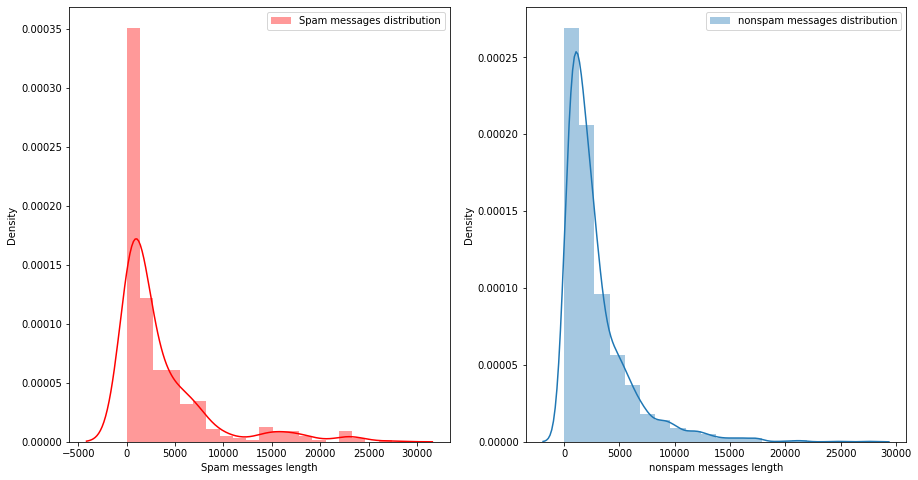

In [ ]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email[email['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam messages length')
ax[0].legend()

sns.distplot(email[email['label']==0]['length'],bins=20,ax=ax[1],label='nonspam messages distribution')
ax[1].set_xlabel('nonspam messages length')
ax[1].legend()

plt.show()

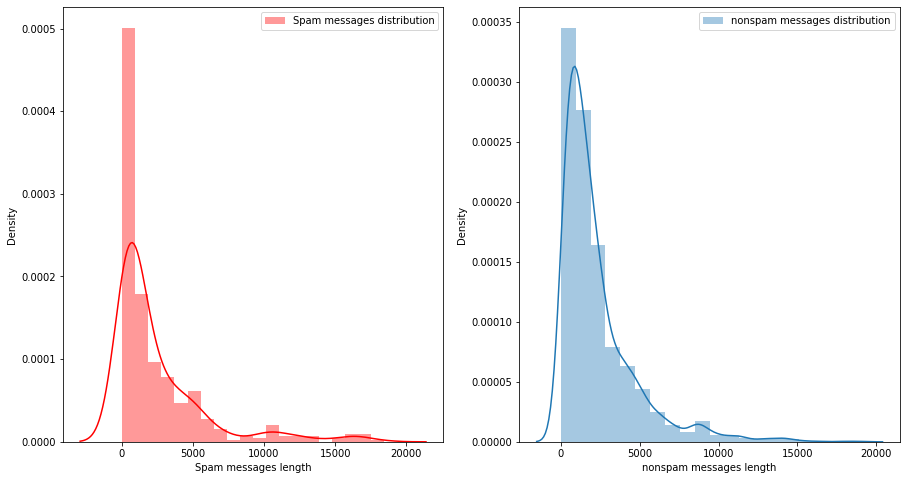

In [ ]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email[email['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam messages length')
ax[0].legend()

sns.distplot(email[email['label']==0]['clean_length'],bins=20,ax=ax[1],label='nonspam messages distribution')
ax[1].set_xlabel('nonspam messages length')
ax[1].legend()

plt.show()

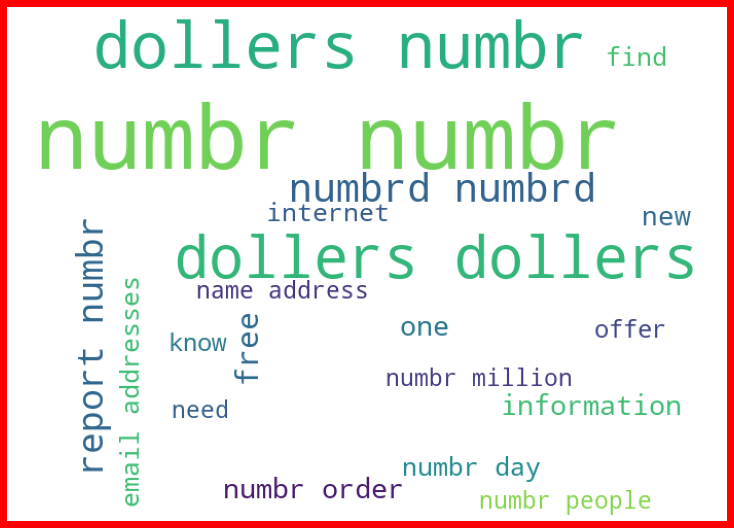

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud

spams = email['message'][email['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
we can clearly see that words "Free,offer,numbrd,etc..," indicates spam messages 

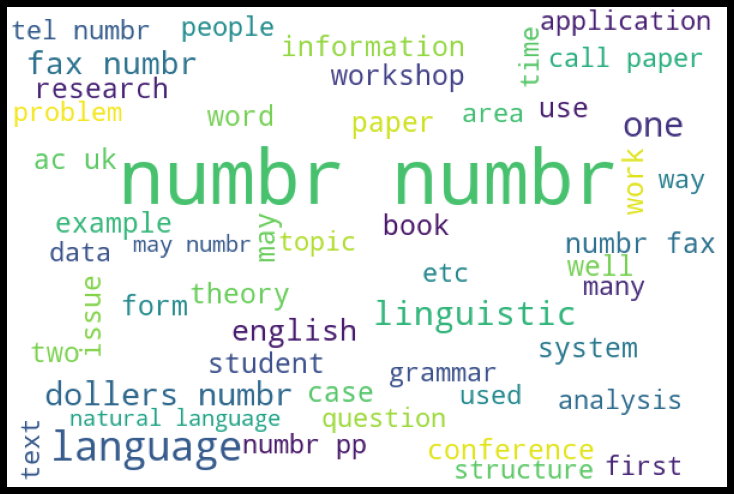

In [ ]:
#Getting sense of loud words in non spam 

nonspam = email['message'][email['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(nonspam))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(email['message'])

X = features
y = email['label']


In [ ]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=30)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8839779005524862


In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       620
           1       1.00      0.19      0.32       104

    accuracy                           0.88       724
   macro avg       0.94      0.60      0.63       724
weighted avg       0.90      0.88      0.85       724



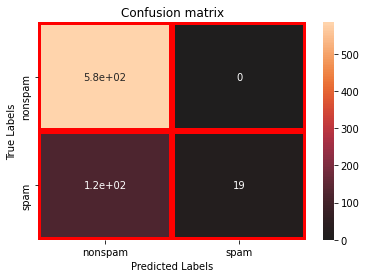

In [ ]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['nonspam','spam'])
ax.yaxis.set_ticklabels(['nonspam','spam'])
plt.show()

In [ ]:
conf_mat

array([[585,   0],
       [120,  19]])

Accuracy / F-score of the data is 88% ,which is good to detect spam messages from an emails.


Above confusion matrix shows no of spam & non spam messages from emails.



**2 : Spam Detection for email's subject**

In [ ]:
# Convert all messages to lower case
email['subject'] = email['subject'].str.lower()

In [ ]:
# Replace email addresses with 'email'
email['subject'] = email['subject'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
# Replace URLs with 'webaddress'
email['subject'] = email['subject'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
email['subject'] = email['subject'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email['subject'] = email['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')    
# Replace numbers with 'numbr'
email['subject'] = email['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')


In [ ]:
# Remove punctuation
email['subject'] = email['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
email['subject'] = email['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
email['subject'] = email['subject'].str.replace(r'^\s+|\s+?$', '')

# Remove leading and trailing whitespace
email['subject'] = email['subject'].str.replace('NaN', 'novalue')

In [ ]:
import numpy as np
email1 = email.replace(np.nan, '', regex=True)

In [ ]:
email1.head()

subject  ... clean_length
0             job posting apple iss research center  ...           37
1                                                    ...             
2  query letter frequencies for text identification  ...           48
3                                              risk  ...            4
4                          request book information  ...           24

[5 rows x 5 columns]

In [ ]:
# New column (clean_length) after puncuations,stopwords removal
email1['clean_length'] = email1.subject.str.len()
email1.head()

subject  ... clean_length
0             job posting apple iss research center  ...           37
1                                                    ...            0
2  query letter frequencies for text identification  ...           48
3                                              risk  ...            4
4                          request book information  ...           24

[5 rows x 5 columns]

In [ ]:
# Total length removal
print ('Origian Length', email1.length.sum())
print ('Clean Length', email1.clean_length.sum())

Origian Length 8578715
Clean Length 87658


In [ ]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features1 = tf_vec.fit_transform(email1['subject'])

X1 = features1
y1 = email1['label']

In [ ]:
# Train and predict
X1_train,x1_test,Y1_train,y1_test = train_test_split(X1,y1,random_state=30)

naive.fit(X1_train,Y1_train)

y1_pred= naive.predict(x1_test)

print ('Final score = > ', accuracy_score(y1_test,y1_pred))

Final score = >  0.9267955801104972


In [ ]:
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       620
           1       1.00      0.49      0.66       104

    accuracy                           0.93       724
   macro avg       0.96      0.75      0.81       724
weighted avg       0.93      0.93      0.92       724



In [1]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y1_test,y1_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['nonspam','spam'])
ax.yaxis.set_ticklabels(['nonspam','spam'])
plt.show()

NameError: ignored

Accuracy / F-score of the data is 92% ,which is good to detect spam subject from an emails.